## Logistic Regression from Scratch


Hello Everyone. In this tutorial, we will implement Logistic Regression from scratch. 

So, let's get started.

### Step-1 Import Dependencies

#### numpy:
for numerical calculations

#### pandas:
for data modelling and access data from files

#### matplotlib:
to plot data

In [24]:
# Import Dependencies

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

## Step-2: Define the Hypothesis

Next step is to define our hypothesis. As we saw in the theory part that the hypothesis for Logistic Regression is same as the Linear Regression but with only one minor difference i.e. in Logistic Regression we take the Sigmoid of the hypothesis before going further with it.

So, let's define these things first.


In [25]:
# Sigmoid Function
# sigmoid(x) = 1 / (1 + exp(-x))

def sigmoid(z):
    return float(1.0 / float(1.0 + np.exp(-1.0 * z)))

In [42]:
# Hypothesis Function
# y_hat = m*X
# Hypothesis = sigmoid(y_hat) => sigmoid(m*X)

def hypothesis(m, X):
    z = 0
    for i in range(len(m)):
        z += X[i] * m[i]
    return sigmoid(z)

### Step-3: Cost Function

So, if we see the theory for Logistic Regression and look at the mathematics in that, our next step seems to be forming a Cost Function for Logistic Regression.

So, let's write our Cost Function.

In theory, we defined our final Cost Function expression as follows:

#### J = (1/n) [-y * log(sigmoid(m*X)) - (1 - y) * log(1 - sigmoid(m*X)) ]

where,

#### y : Class label [0 or 1]

Also, we know that according to the value of the class i.e. 0 or 1, the cost function reduces to:

#### J = -log(sigmoid(m*X))  for y = 1

#### J = -log(1 - sigmoid(m*X))   for y = 0 

So, let's write our cost function using these equations.

In [43]:
# Cost Function
# J = (-1/n) [y log(sigmoid(mX + b)) + (1 - y) log(1 - sigmoid(mX + b))]

def costFunction(X,y,m):
    errorSum = 0
    error = 0
    n = len(y)
    for i in range(n):
        hy = hypothesis(m,X[i])
        if y[i] == 1:
            error = y[i] * np.log(hy)
        elif y[i] == 0:
            error = (1-y[i]) * np.log(1 - hy)
        errorSum += error
    J = (-1/n) * errorSum
    print('Cost: ', J)
    return J


So, now that we have defined our Cost Function, it's time to define our Gradient Descent Function. So, let's do it.


## Step-4: Gradient Descend

How does Gradient Descend works ?? We find the derivative of the Cost Function w.r.t "m" i.e. dJ/dm and then calculate the error. After this we update the value of m as:

#### m := m - alpha * dJ/dm

where,

#### alpha: Learning Rate

So, what is dJ/dm for this case ??

Let's calculate it.

#### J = (-1/n) [-y * log(sigmoid(m*X)) + (1 - y) * log(1 - sigmoid(m*X)) ]

where, 

#### y_hat = sigmoid(m*X)

So, the equation becomes:

#### J = (-1/n) [-y * log(y_hat) + (1 - y) * log(1 - y_hat)]         - - - (i)

and 

#### y_hat = 1/(1 + exp(-m*X))

So, let's go step by step.

#### log(y_hat) = 1 / (1 + exp(-mX))

or

#### log(y_hat) = -log(1 + exp(-mX))                        - - - (ii)


Now the seocnd part of this equation.

#### log(1 - y_hat) = log(1 - (1 / (1 + exp(-mX))))

So, this can be written as:

#### log(1 - y_hat) = log( exp(-mX) / (1 + exp(-mX)))

which can be written as:

#### log(1 - y_hat) = log(exp(-mX)) - log(1 +  exp(-mx))

#### log(1 - y_hat) = -mX - log(1 + exp(-mX))           - - - (iii)

Putting all these values in the equation of Cost Function, eqn (i), we get:


#### J = (-1/n)  summation [ -y log(1 + exp(-mX)) + (1 - y) ( -mX - log(1 + exp(-mX)))]                 - - - (iv)

which can be written as:

#### J = (-1/n)  summation [ (y * mX) - mX - log(1 + exp(-mX)))]              - - - (v)

Now, the second term in the equation (v) can be simplified as:

#### [-mX - log(1 + exp(-mX))]    =   - [log(exp(-mX)) + log(1 + exp(-mx))]    =  - [log(1 + exp(-mX))]        - - - (vi)

using the quality of "log" equation i.e. 

#### log(x) + log(y) = log(xy)

Putting this equation to equation (v), we get:

#### J = (-1/n)  summation [ (y * mX) - log(1 + exp(mX)))]             - - - (vii)

Now, we have the final cost function. Let's calculate the derivative of this i.e. dJ/dm

Taking first term first:

#### d/dm (y*mX) = yX      - - - (viii (a))

#### d/dm (log(1 + exp(mX)))  = ( X * exp(mx) ) / (1 + exp(mX))   =  X * (y_hat)         - - - (viii (b))


From (viii) "a" and "b" we get the following final equation:

### dJ/dm = (1/n) summation( y - y_hat) X             - - - (ix)


So, to update the value of "m", we get the equation:

### m : = m - alpha * dJ/dm


Let's implement this function... 


In [55]:
# Gradient Descent
# X,y: Features,Labels
# m: Slope
# lr: Learning Rate

def gradientDescend(X,y,m,lr):
    new_m = []
    n = len(y)
    const = lr/n
    for j in range(len(m)):
        errorSum = 0
        for i in range(n):
            Xi = X[i]
            Xij = Xi[j]
            hi = hypothesis(m, X[i])
            error = (hi - y[i]) * Xij
            errorSum += error
        n = len(y)
        const = float(lr) / float(n)
        J = const * errorSum
        updated_m = m[j] - J
        new_m.append(updated_m)
    return new_m

Now that we are done with our Gradient Descend function, one last thig is left. This function currently will run only once whereas we know that to minimize the loss/cost, gradient descend requires more than one step down the slope.

So, let's define that last function.

In [56]:
# Runner Function
# X: Features
# y: Labels
# lr: Learning Rate
# m: Slope
# iters: Number of Iterations

def runner(X,y,lr,m,iters):
    n = len(y)
    a = 0
    hist = []
    print('Starting Gradient Descend...\n')
    for x in range(iters):
        new_m = gradientDescend(X,y,m,lr)
        m = new_m
        a = costFunction(X,y,m)
        hist.append(a)
        
        # Print the information at every 100th step 
        if x % 100 == 0:
            costFunction(X,y,m)
            print('m: ', m)
            print('Cost ', costFunction(X,y,m))
            print('\n')
    return [m,hist]

So, now that we are all done with our functions, let's load the data and finally test what all hardwork we have done till yet. Hold on just a bit longer...

## Step-5: Load the Dataset

For this tutorial, we will be using the "Haberman's Survival Dataset". You can download this dataset from here [https://archive.ics.uci.edu/ml/datasets/Haberman's+Survival].

So, what is this dataset all about. Well, this dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

This dataset has the following attributes:
1. Age of patient at time of operation (numerical) 
2. Patient's year of operation (year - 1900, numerical) 
3. Number of positive axillary nodes detected (numerical) 
4. Survival status (class attribute) 
-- 1 = the patient survived 5 years or longer 
-- 2 = the patient died within 5 year

So, as you can see that this dataset classifies that whether a person survived more than 5 years or less than that based on his age, year of operation and the number of positive axillary nodes detected.

Let's load the dataset and have a look at it.

In [57]:
# Load the Dataset

df = pd.read_csv('dataset/haberman-data.csv')

# Let's have a look at it

df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


So, it looks like our data does not have any labels. let's add labels to the columns.

In [58]:
# Let's give names to the Columns

df.columns = ['age','year_operation','pos_auxillary_nodes','survival_status']

# Let's check the data again
df.head()

,age,year_operation,pos_auxillary_nodes,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


Well, it looks good. All columns have a name now. 

Let's describe it as well to check if its balaced or not.

In [59]:
# Describe the data

df.describe()

,age,year_operation,pos_auxillary_nodes,survival_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Dataset looks pretty balanced to me. Now, to the nest step. Let's do feature selection.

## Step-6: Feature Selection

So, how do we do this ?? Correlation. Yes, you are right. Let's do it.

In [60]:
# Correlation

df.corr()

,age,year_operation,pos_auxillary_nodes,survival_status
age,1.000000,0.092623,-0.066548,0.064351
year_operation,0.092623,1.000000,-0.003277,-0.004076
pos_auxillary_nodes,-0.066548,-0.003277,1.000000,0.286191
survival_status,0.064351,-0.004076,0.286191,1.000000


Since, this dataset has less number of features and from the correlation report all of them look important. So, let's take them all.

In [61]:
# Features:

X = np.array(df[['age','year_operation','pos_auxillary_nodes']])
print('Features: ',X)

Features:  [[30 62  3]
 [30 65  0]
 [31 59  2]
 [31 65  4]
 [33 58 10]
 [33 60  0]
 [34 59  0]
 [34 66  9]
 [34 58 30]
 [34 60  1]
 [34 61 10]
 [34 67  7]
 [34 60  0]
 [35 64 13]
 [35 63  0]
 [36 60  1]
 [36 69  0]
 [37 60  0]
 [37 63  0]
 [37 58  0]
 [37 59  6]
 [37 60 15]
 [37 63  0]
 [38 69 21]
 [38 59  2]
 [38 60  0]
 [38 60  0]
 [38 62  3]
 [38 64  1]
 [38 66  0]
 [38 66 11]
 [38 60  1]
 [38 67  5]
 [39 66  0]
 [39 63  0]
 [39 67  0]
 [39 58  0]
 [39 59  2]
 [39 63  4]
 [40 58  2]
 [40 58  0]
 [40 65  0]
 [41 60 23]
 [41 64  0]
 [41 67  0]
 [41 58  0]
 [41 59  8]
 [41 59  0]
 [41 64  0]
 [41 69  8]
 [41 65  0]
 [41 65  0]
 [42 69  1]
 [42 59  0]
 [42 58  0]
 [42 60  1]
 [42 59  2]
 [42 61  4]
 [42 62 20]
 [42 65  0]
 [42 63  1]
 [43 58 52]
 [43 59  2]
 [43 64  0]
 [43 64  0]
 [43 63 14]
 [43 64  2]
 [43 64  3]
 [43 60  0]
 [43 63  2]
 [43 65  0]
 [43 66  4]
 [44 64  6]
 [44 58  9]
 [44 63 19]
 [44 61  0]
 [44 63  1]
 [44 61  0]
 [44 67 16]
 [45 65  6]
 [45 66  0]
 [45 67  1]
 [45 

In [62]:
# Preprocessing data to normalize data points and bring to same scale
# using MinMaxScala brings all data point to range between -1 and 1

min_max_scaler = MinMaxScaler(feature_range=(-1,1))
X = min_max_scaler.fit_transform(X)
print('Preprocessed Features: ',X)

Preprocessed Features:  [[-1.         -0.27272727 -0.88461538]
 [-1.          0.27272727 -1.        ]
 [-0.96226415 -0.81818182 -0.92307692]
 [-0.96226415  0.27272727 -0.84615385]
 [-0.88679245 -1.         -0.61538462]
 [-0.88679245 -0.63636364 -1.        ]
 [-0.8490566  -0.81818182 -1.        ]
 [-0.8490566   0.45454545 -0.65384615]
 [-0.8490566  -1.          0.15384615]
 [-0.8490566  -0.63636364 -0.96153846]
 [-0.8490566  -0.45454545 -0.61538462]
 [-0.8490566   0.63636364 -0.73076923]
 [-0.8490566  -0.63636364 -1.        ]
 [-0.81132075  0.09090909 -0.5       ]
 [-0.81132075 -0.09090909 -1.        ]
 [-0.77358491 -0.63636364 -0.96153846]
 [-0.77358491  1.         -1.        ]
 [-0.73584906 -0.63636364 -1.        ]
 [-0.73584906 -0.09090909 -1.        ]
 [-0.73584906 -1.         -1.        ]
 [-0.73584906 -0.81818182 -0.76923077]
 [-0.73584906 -0.63636364 -0.42307692]
 [-0.73584906 -0.09090909 -1.        ]
 [-0.69811321  1.         -0.19230769]
 [-0.69811321 -0.81818182 -0.92307692]
 

c:\users\ad1026858\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [63]:
# Labels

y = np.array(df['survival_status'])
print('Labels: ',y)

Labels:  [1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 2 2 2 1 1 1 1 1 1 1 2 2
 2 1 1 1 1 2 2 2 1 1 1 1 1 1 2 2 2 2 1 1 1 2 2 2 1 1 1 1 1 1 1 1 2 2 2 1 1
 1 1 2 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 2 2 2 2 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1
 1 1 1 1 2 2 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1
 2 2 1 1 1 1 2 2 2 1 1 1 1 1 1 2 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2
 2 2 1 1 1 1 1 1 2 2 1 1 1 2 2 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 1 1 1 2 1 1 1
 1 1 2 1 1 1 1 2 2]


Now, since, we have three features, we require three slopes. One for each feature.

So, the equation is like:

#### y_hat = sigmoid(m1X1 + m2X2 + m3X3)

Here, we will define the slope as an array and refer to them as follows:

#### m = [0,0,0]

#### m1:  m[0]

#### m2: m[1]

#### m3: m[2]

Similarly for the values of X:

#### 'age' : X[0]

#### 'year_operation' : X[1]

#### 'pos_auxillary_nodes' : X[2]


In [64]:
# Training Parameters

# Initial Slopes [m1,m2,m3]
initial_m = [0,0,0]

# Learning Rate
learning_Rate = 0.01

# Number of Iterations
iterations = 2000

In [66]:
# Initial Cost

print('Initial Cost with m1 = {0}, m2 = {1} and m3 = {2} is Cost = {3}'.format(initial_m[0],initial_m[1],initial_m[2],costFunction(X,y,initial_m)))

Cost:  0.69314718056
Initial Cost with m1 = 0, m2 = 0 and m3 = 0 is Cost = 0.6931471805599467


So, now that we have defined all the inputs, defined all the functions, it's time to test our classifier. So, let's run it.

In [65]:
# Run the Classifier

[m,hist] = runner(X,y,learning_Rate,initial_m,iterations)

Cost:  0.690300019945
Cost:  0.690300019945
m:  [-0.0010315496442932252, -0.00091654247391951681, -0.0061179066834804478]
Cost:  0.690300019945
Cost  0.690300019945


Cost:  0.687467380957
Cost:  0.684649197228
Cost:  0.681845402404
Cost:  0.679055930154
Cost:  0.676280714174
Cost:  0.673519688191
Cost:  0.670772785969
Cost:  0.668039941318
Cost:  0.665321088094
Cost:  0.662616160204
Cost:  0.659925091618
Cost:  0.657247816364
Cost:  0.654584268541
Cost:  0.65193438232
Cost:  0.649298091949
Cost:  0.646675331757
Cost:  0.644066036161
Cost:  0.641470139668
Cost:  0.638887576882
Cost:  0.636318282504
Cost:  0.633762191341
Cost:  0.631219238307
Cost:  0.628689358428
Cost:  0.626172486847
Cost:  0.623668558827
Cost:  0.621177509754
Cost:  0.618699275143
Cost:  0.616233790639
Cost:  0.613780992024
Cost:  0.611340815215
Cost:  0.608913196277
Cost:  0.606498071414
Cost:  0.604095376985
Cost:  0.601705049496
Cost:  0.599327025612
Cost:  0.596961242156
Cost:  0.594607636112
Cost:  0.59226614462

In [69]:
# Final Cost

print('Value of m after {0} iterations is m1 = {1}, m2 = {2}, m3 = {3}'.format(iterations,m[0],m[1],m[2]))

Value of m after 2000 iterations is m1 = -0.8698291769049067, m2 = -0.7762916960867493, m3 = -5.33904524111204


So, we can clearly see that the Cost decreases and after 2000 iterations we have the values for our three slopes i.e. m1, m2 and m3.

Let's plot the Cost Function for this.

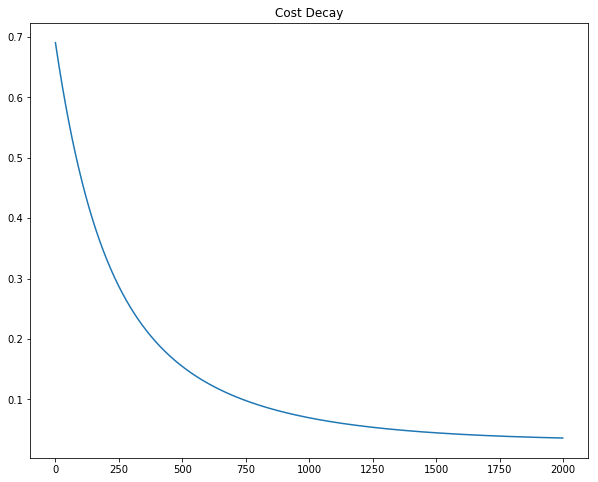

In [72]:
# Plot Cost Function Decay

fig,ax = plt.subplots(figsize=(10,8))
ax.plot(hist)
ax.set_title('Cost Decay')

The cost function plot shows that how it decays and becomes stable after 2000 iterations.

#### I hope this tutorial was informative enough. For any comments, suggestions, corrections, please feel free to leave them below. Thanks :)